# **Machine Learning**

From Udemy course '**Learning Phyton for Data Analysis and Visualization**' by Jose Portilla

### **7. NLP (Natural Language Processing)**

In [106]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns. set_style('whitegrid')
%matplotlib inline
from sklearn.datasets import load_boston

**Run this cell if tou need to download NLTK and have conda!
<br>!conda install nltk #This installs nltk
<br>import nltk # Imports the library
<br>nltk.download() #Download the necessary datasets**

In [107]:
import nltk

In [108]:
messages = [line.rstrip() for line in open(r'C:\Users\husey\Desktop\python\udemy\2LearningPythonforData\smsspamcollection/SMSSpamCollection')]
print(len(messages)) 

5574


In [109]:
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [110]:
messages = pd.read_csv(r'C:\Users\husey\Desktop\python\udemy\2LearningPythonforData\smsspamcollection/SMSSpamCollection',
                           sep='\t', names=["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [111]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [112]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [113]:
messages['length'] = messages['message'].apply(len)

In [114]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<AxesSubplot:ylabel='Frequency'>

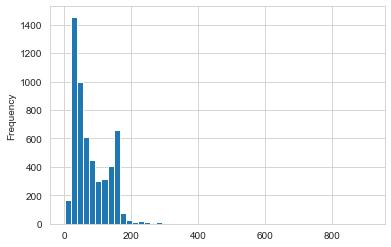

In [115]:
messages['length'].plot(bins=50, kind='hist') 

In [116]:
messages.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [117]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

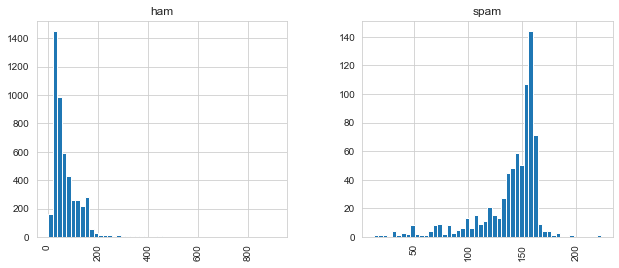

In [118]:
messages.hist(column='length', by='label', bins=50,figsize=(10,4))

In [119]:
import string

In [120]:
mess = 'Sample message! Notice: it has punctuation.'

**M**

In [121]:
# Check characters to see if they are in punctuation
nopunc = [char for char in mess if char not in string.punctuation]

**M**

In [122]:
# Join the characters again to form the string.
nopunc = ''.join(nopunc)
nopunc 

'Sample message Notice it has punctuation'

**M**

In [123]:
from nltk.corpus import stopwords

In [124]:
stopwords.words('english')[0:10] # Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

**M**

In [125]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

**M**

In [126]:
# Now just remove any stopwords
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

**M**

In [127]:
def text_process(mess):
    # Remove all punctuation, stopwords and cleaned the text!
    nopunc = [char for char in mess if char not in string.punctuation]  # Remove punctuation
    nopunc = ''.join(nopunc)  # Join the characters again
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [128]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


**M**

In [129]:
# Check to make sure its working
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

**M**

In [130]:
# Show original dataframe
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


**M**

In [131]:
from sklearn.feature_extraction.text import CountVectorizer

In [132]:
bow_transformer = CountVectorizer(analyzer=text_process)
bow_transformer.fit(messages['message'])

CountVectorizer(analyzer=<function text_process at 0x000001DE8C258B80>)

**M**

In [133]:
# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

11425


**M**

In [134]:
# Print total number of vocab words
print len(bow_transformer.vocabulary_)

SyntaxError: invalid syntax (Temp/ipykernel_12836/3630633119.py, line 2)

**M**

In [ ]:
# /anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
message4 = messages['message'][3]
print(message4)

**M**

In [ ]:
bow4 = bow_transformer.transform([message4])
print(bow4) # bow = bag of words

In [ ]:
print(bow4.shape)

In [ ]:
print(bow_transformer.get_feature_names()[4073])

In [ ]:
print(bow_transformer.get_feature_names()[9570])

**M**

In [ ]:
messages_bow = bow_transformer.transform(messages['message'])
print('Shape of Sparse Matrix: ', messages_bow.shape)

In [ ]:
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

In [ ]:
print('sparsity: %.2f%%' % (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1])))

**M**

In [ ]:
# /anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal

**M**

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

In [ ]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])

In [ ]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

In [ ]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])
print('predicted:', spam_detect_model.predict(tfidf4)[0])

In [ ]:
print('expected:', messages.label[3])

In [ ]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(messages['label'], all_predictions))

In [ ]:
from sklearn.model_selection import train_test_split
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.2)
print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))


In [ ]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
pipeline.fit(msg_train,label_train)

In [ ]:
predictions = pipeline.predict(msg_test)
print(classification_report(predictions,label_test))